In [1]:
from dataset import *
from model_m1_revised import *
import torch
import numpy as np
from PIL import Image
from torchvision.transforms.functional import to_tensor, to_pil_image
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance
from utils import visual_test

In [2]:
# Hyperparameters.
seed = 0
batch_size = 1
num_slots = 7
num_iterations = 3
resolution = (128, 128)

In [3]:
resolution = (128, 128)
model = SlotAttentionAutoEncoder(resolution, num_slots, num_iterations, 64).eval()
model.load_state_dict(torch.load('./experiments/m1-visual-16x16/weights/model_85.ckpt')['model_state_dict'])

<All keys matched successfully>

In [4]:
test_set = CLEVR(root='/viscam/data/clevr' ,split='test')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.0357, device='cuda:0', grad_fn=<MinBackward1>) tensor(0.6822, device='cuda:0', grad_fn=<MaxBackward1>)
0.21042322 1.0098464
0.9851751 1.000202
0.11110642 1.0031958
0.2552795 1.0129973
0.5836104 0.9976769
0.6030146 0.9981865
0.98128074 1.0001184


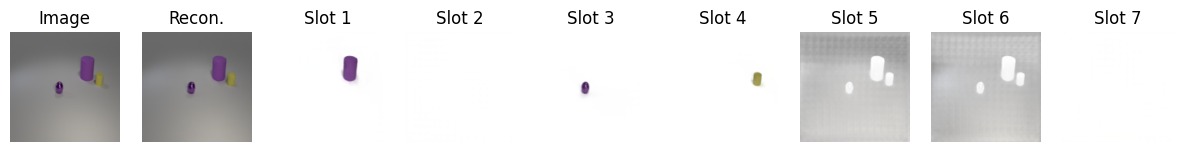

In [5]:
model = model.to(device)
image = test_set[7]['image']
image = image.unsqueeze(0).to(device)
# recon_combined, recons, masks, slots, position_latent, scale_latent = model(image, return_latents=True)
# # print(position_latent, scale_latent)
# fig, ax = plt.subplots(1, num_slots + 2, figsize=(15, 2))
# image = image.squeeze(0)
# recon_combined = recon_combined.squeeze(0)
# print(recon_combined.min(), recon_combined.max())
# recons = recons.squeeze(0)
# masks = masks.squeeze(0)
# image = image.permute(1,2,0).cpu().numpy()
# recon_combined = recon_combined.permute(1,2,0)
# recon_combined = recon_combined.cpu().detach().numpy()
# recons = recons.cpu().detach().numpy()
# masks = masks.cpu().detach().numpy()
# ax[0].imshow(image)
# ax[0].set_title('Image')
# ax[1].imshow(recon_combined)
# ax[1].set_title('Recon.')
# for i in range(7):
#   picture = recons[i] * masks[i] + (1 - masks[i])
#   print(picture.min(), picture.max())
#   ax[i + 2].imshow(picture)
#   ax[i + 2].set_title('Slot %s' % str(i + 1))
# for i in range(len(ax)):
#   ax[i].grid(False)
#   ax[i].axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.036695715 0.68247294
-404.77994 242.05556
-46.707664 31.452248
-1414.0897 216.10936
-1283.8676 560.93964
0.49298063 1.310217
0.37627494 1.2111923
-115.574295 29.873596


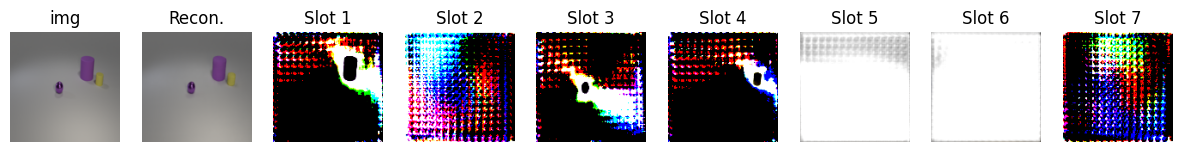

In [6]:
model = model.to(device)
image = test_set[7]['image']
image = image.unsqueeze(0).to(device)
recon_combined, recons, masks, slots, position_latent, scale_latent = model(image, return_latents=True)
visual_test(model, image, slots, position_latent, scale_latent)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.036571678 0.6830994
-884.85516 354.8555
-46.707664 31.452248
-1414.0897 216.10936
-1283.8676 560.93964
0.49298063 1.310217
0.37627494 1.2111923
-115.574295 29.873596


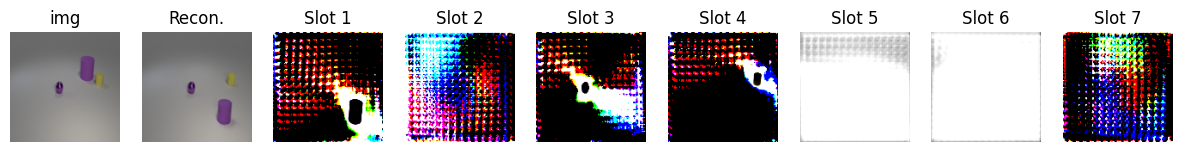

In [7]:
position_latent[0] = torch.tensor([0.5, 0.5])
visual_test(model, image, slots, position_latent, scale_latent)
